In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('drive/MyDrive/proj dataset/archive'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        #print(path)
        imagepaths.append(path)

print(len(imagepaths))

681


In [ ]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('drive/MyDrive/proj dataset/archive/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

In [ ]:
#print(len(X))
#print(y)

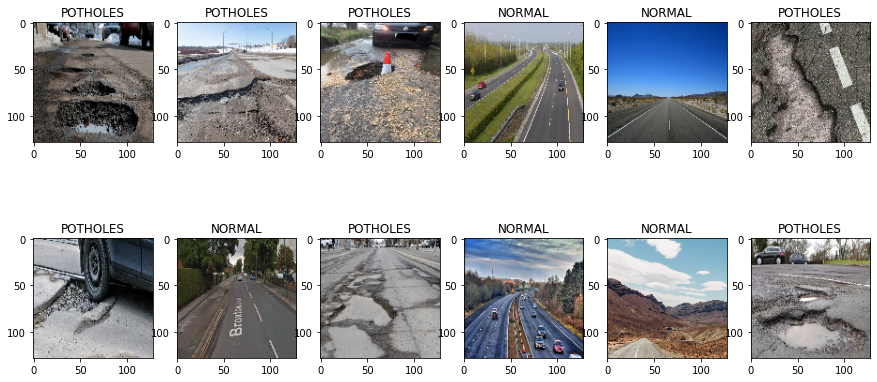

In [ ]:
import random as rn
fig,ax=plt.subplots(2,6)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (6):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [ ]:

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
history=model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Epoch 1/30
43/43 - 14s - loss: 2.9701 - accuracy: 0.5098 - val_loss: 0.6876 - val_accuracy: 0.5471 - 14s/epoch - 328ms/step
Epoch 2/30
43/43 - 0s - loss: 0.6636 - accuracy: 0.5961 - val_loss: 0.7048 - val_accuracy: 0.4353 - 439ms/epoch - 10ms/step
Epoch 3/30
43/43 - 0s - loss: 0.6601 - accuracy: 0.6157 - val_loss: 0.5502 - val_accuracy: 0.7765 - 424ms/epoch - 10ms/step
Epoch 4/30
43/43 - 0s - loss: 0.5459 - accuracy: 0.7255 - val_loss: 0.5134 - val_accuracy: 0.7059 - 455ms/epoch - 11ms/step
Epoch 5/30
43/43 - 0s - loss: 0.4854 - accuracy: 0.7824 - val_loss: 0.4772 - val_accuracy: 0.8588 - 437ms/epoch - 10ms/step
Epoch 6/30
43/43 - 0s - loss: 0.4532 - accuracy: 0.8020 - val_loss: 0.4773 - val_accuracy: 0.7000 - 436ms/epoch - 10ms/step
Epoch 7/30
43/43 - 1s - loss: 0.5043 - accuracy: 0.7863 - val_loss: 0.3876 - val_accuracy: 0.8176 - 576ms/epoch - 13ms/step
Epoch 8/30
43/43 - 0s - loss: 0.4404 - accuracy: 0.8412 - val_loss: 0.4320 - val_accuracy: 0.7824 - 499ms/epoch - 12ms/step
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 0s 23ms/step - loss: 0.2971 - accuracy: 0.9176
Test accuracy: 91.76%


In [ ]:
prediction = model.predict(x_test)

6/6 [==============================] - 0s 5ms/step


In [ ]:
y_pred = np.argmax(prediction, axis=1)

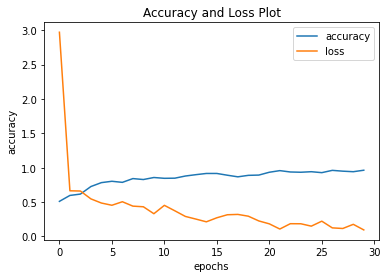

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy and Loss Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','loss'], loc='upper right')
plt.show()

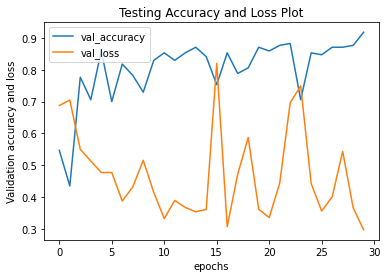

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Testing Accuracy and Loss Plot')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy and loss')
plt.legend(['val_accuracy','val_loss'], loc='upper left')
plt.show()

In [ ]:
# Making predictions on test data
prediction = model.predict(x_test)

6/6 [==============================] - 0s 5ms/step


In [ ]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [ ]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a) 

In [ ]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NORMAL", "Predicted POTHOLES"],
             index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,85,11
Actual POTHOLES,3,71


In [ ]:
IMG_SIZE=128

# training config:
epochs = 5
batch_size = 32

X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('drive/MyDrive/proj dataset/archive/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass


In [ ]:
IMG_SIZE=128

# training config:
epochs = 5
batch_size = 32

filename=[]
y=[]
for image in imagepaths:
    try:
        #filename.append(image[image.rfind('/')+1:])
        filename.append(image)
        if(image.startswith('drive/MyDrive/proj dataset/archive/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

In [ ]:
img_df = pd.DataFrame(
    {'filename': filename,
     'y': y
    })

img_df=img_df.sample(frac=1)

In [ ]:
tr_img=img_df[:450]
valid_img=img_df[450:]
print(tr_img)
print(valid_img)

                                              filename         y
645   drive/MyDrive/proj dataset/archive/normal/82.jpg    NORMAL
259  drive/MyDrive/proj dataset/archive/potholes/32...  POTHOLES
47   drive/MyDrive/proj dataset/archive/potholes/14...  POTHOLES
272  drive/MyDrive/proj dataset/archive/potholes/65...  POTHOLES
313  drive/MyDrive/proj dataset/archive/potholes/88...  POTHOLES
..                                                 ...       ...
87   drive/MyDrive/proj dataset/archive/potholes/18...  POTHOLES
214  drive/MyDrive/proj dataset/archive/potholes/29...  POTHOLES
13   drive/MyDrive/proj dataset/archive/potholes/10...  POTHOLES
251  drive/MyDrive/proj dataset/archive/potholes/31...  POTHOLES
280  drive/MyDrive/proj dataset/archive/potholes/90...  POTHOLES

[450 rows x 2 columns]
                                              filename         y
77   drive/MyDrive/proj dataset/archive/potholes/15...  POTHOLES
429  drive/MyDrive/proj dataset/archive/normal/263.jpg    NORMAL
3

In [ ]:
IMAGE_SIZE = [128, 128]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('drive/MyDrive/proj dataset/archive' + '/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy'])

In [ ]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [ ]:
test_gen = gen.flow_from_dataframe(
        dataframe=img_df,
        #directory='drive/MyDrive/proj dataset/archive',
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 681 validated image filenames belonging to 2 classes.
{'NORMAL': 0, 'POTHOLES': 1}


In [ ]:
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

In [ ]:
print(test_gen)

min: -115.188324 max: 143.31168


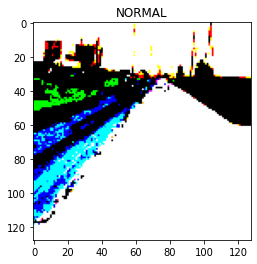

In [ ]:
try:
    for x, y in test_gen:
      print("min:", x[0].min(), "max:", x[0].max())
      plt.title(labels[np.argmax(y[0])])
      plt.imshow(x[0])
      plt.show()
      break
except:
    pass

In [ ]:
train_path = 'drive/MyDrive/proj dataset/archive'
# create generators
train_generator = gen.flow_from_dataframe(
        dataframe=tr_img,
        #directory='/kaggle/input/pothole-detection-dataset',
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batch_size)

valid_generator = gen.flow_from_dataframe(
        dataframe=valid_img,
        #directory='/kaggle/input/pothole-detection-dataset',
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batch_size)

Found 450 validated image filenames belonging to 2 classes.
Found 231 validated image filenames belonging to 2 classes.


In [ ]:
"""import keras.utils as image
import numpy as np
#from keras.preprocessing import image
def checker(str):
  test_image = image.load_img('drive/MyDrive/proj dataset/archive/'+str, target_size = (64, 64))
  plt.imshow(cv2.imread("drive/MyDrive/proj dataset/archive/"+str))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  training_set.class_indices
  if result[0][0] == 1:
    prediction = 'pothole'
  else:
    prediction = 'normal'
  return prediction

print(checker('normal/4.jpg'))"""

'import keras.utils as image\nimport numpy as np\n#from keras.preprocessing import image\ndef checker(str):\n  test_image = image.load_img(\'drive/MyDrive/proj dataset/archive/\'+str, target_size = (64, 64))\n  plt.imshow(cv2.imread("drive/MyDrive/proj dataset/archive/"+str))\n  test_image = image.img_to_array(test_image)\n  test_image = np.expand_dims(test_image, axis = 0)\n  result = model.predict(test_image)\n  training_set.class_indices\n  if result[0][0] == 1:\n    prediction = \'pothole\'\n  else:\n    prediction = \'normal\'\n  return prediction\n\nprint(checker(\'normal/4.jpg\'))'

Epoch 1/5
15/15 [==============================] - 27s 2s/step - loss: 3.6295 - accuracy: 0.8356 - val_loss: 1.5671 - val_accuracy: 0.9091
Epoch 2/5
15/15 [==============================] - 20s 1s/step - loss: 1.0481 - accuracy: 0.9267 - val_loss: 1.1223 - val_accuracy: 0.9177
Epoch 3/5
15/15 [==============================] - 21s 1s/step - loss: 1.1411 - accuracy: 0.9333 - val_loss: 1.6153 - val_accuracy: 0.9091
Epoch 4/5
15/15 [==============================] - 20s 1s/step - loss: 0.9456 - accuracy: 0.9378 - val_loss: 1.1014 - val_accuracy: 0.9394
Epoch 5/5
15/15 [==============================] - 21s 1s/step - loss: 0.6029 - accuracy: 0.9556 - val_loss: 0.6831 - val_accuracy: 0.9437


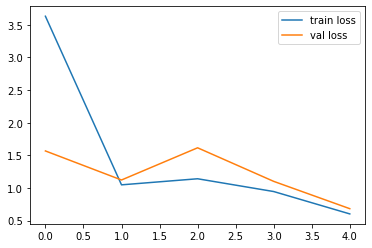

<Figure size 432x288 with 0 Axes>

In [ ]:
# Fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(train_generator),
  validation_steps=len(valid_generator)
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
"""plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')"""

# save it as a h5 file
model.save('model_vgg16.h5')

#Test the model
# import numpy as np
#from keras.preprocessing import image


1/1 [==============================] - 1s 704ms/step
Normal


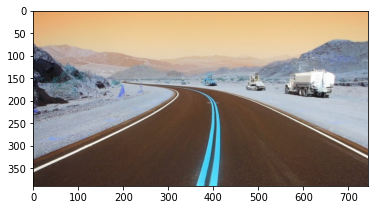

In [ ]:
import keras.utils as image
def checker(str):
  test_image = image.load_img('drive/MyDrive/proj dataset/archive/'+str, target_size = (128, 128))
  plt.imshow(cv2.imread("drive/MyDrive/proj dataset/archive/"+str))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  """if result[0][0] > result[0][1]:
    prediction = 'Normal'
  else:
    prediction = 'Potholes'"""
  if result[0][0] > result[0][1]:
    prediction = 'Normal'
  else:
    prediction = 'Potholes'
  if np.argmax(result[0]) == 0:
    prediction = 'Normal'
  else:
    prediction = 'Potholes'
  return prediction

print(checker('normal/4.jpg'))

1/1 [==============================] - 0s 117ms/step
Potholes


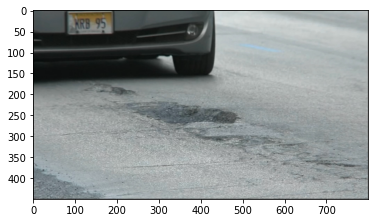

In [ ]:

print(checker('potholes/103.jpg'))